# Aanegola Generation - 2
This algorithm draws inspiration from the delivery problem with a very closed mind. Let us say that whenever we are at a certain location, we are provided another random location that we consider to be our 'destination'. This process is repeated until we have explored all possible 'destinations'.

## How does it work?
We simply store a list of unvisited nodes, consider a random node to be our inception point and randomly choose destinations till there aren't any left. When we have selected our 'source' and our 'destination' we know that to get to the destination, we need to make only one turn. For example if we need to get from (1, 1) to (3, 4) we can either traverse in +x and then +y or vice versa. We repeat this traversal till we have carved a path through every node.

## Will it always be connected?
Yes it will be. We carve a path to every single node starting from an inception node, and hence it will be possible to trace a path from every node to every other node by simply tracing this path.

In [2]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

In [3]:
def AanegolaGen2(maze):
    # Make a list of all the nodes
    nodes = []
    for i in range(0, maze.num_columns):
        for j in range(0, maze.num_rows):
            nodes.append((i, j))
    
    start = random.choice(nodes)
    nodes.remove(start)
    
    while len(nodes):
        # Select a random destination node
        end = random.choice(nodes)
        
        # Get its individual coordinates 
        x1, y1 = start
        x2, y2 = end
        
        # Make a list of all possible directions
        choices = []
        if x1 <= x2:
            choices.append('E')
        else:
            choices.append('W')
        if y1 <= y2:
            choices.append('S')
        else:
            choices.append('N')
        
        # If there are valid directions, carve the path
        while len(choices):
            direction = random.choice(choices)
            choices.remove(direction)
            
            if direction == 'N' or direction == 'S':
                while y1 != y2:
                    maze.add_path((x1, y1), direction, 0)
                    if direction == 'N':
                        y1 -= 1
                    else:
                        y1 += 1
                    if (x1, y1) in nodes:
                        nodes.remove((x1, y1))
            else:
                while x1 != x2:
                    maze.add_path((x1, y1), direction, 0)
                    if direction == 'W':
                        x1 -= 1
                    else:
                        x1 += 1
                    if (x1, y1) in nodes:
                        nodes.remove((x1, y1))
        # Make the end node the new start node
        if end in nodes:
            nodes.remove(end)
        start = end

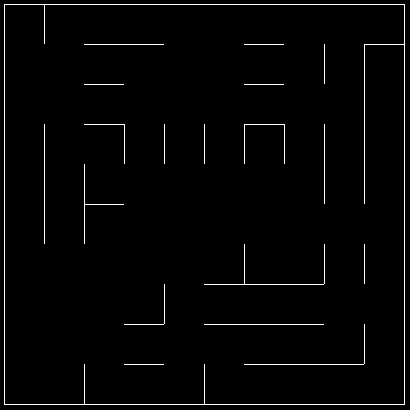

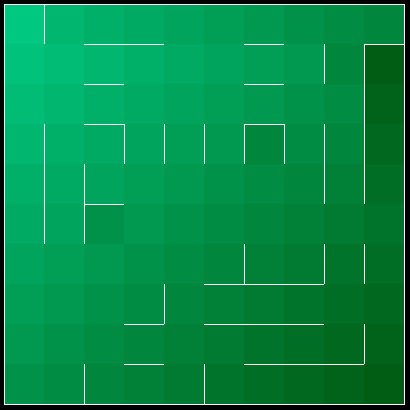

In [8]:
maze = Maze(10, 10)
AanegolaGen2(maze)
display(maze.draw(cell_width=40))
maze.add_colors(color=(0, 200, 128))
display(maze.draw(cell_width=40))

## Basic analysis
### Time complexity : O(N<sup>3</sup>)
The algorithm creates a list of all the nodes which is of order N<sup>2</sup>, and then iterates over them. At each iterative step, we traverse over atmost 2N nodes, and we do this process atmost N<sup>2</sup> times.
### Additional Space : O(N<sup>2</sup>)
We need a list of all the nodes in the grid, and hence need to store N<sup>2</sup> elements. We also have the overhead of the choices and x, y variables of order 1.
### Bias
As we can see the mazes generated tend to be very open. Since we carve a path multiple times through each node, we have a higher concentration of completely open spaces. We also see a very distinctive pattern in the sort of spiral pattern we obtain. This is because all our paths created are 'single turn' paths and we obtain this angular spiral pattern.

In [6]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    
    AanegolaGen2(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  0.230000
Straightways  :  37.910000
   LeftTurns  :  0.220000
  RightTurns  :  0.260000
   Junctions  :  4.090000
  Crossroads  :  57.290000


### Further analysis
As we can see, the maze generates a lot of crossroads (empty spaces) and less deadends. The straightway percentage is also very high as towards the edges we have more straight passages as the probability of choosing noded near the edges is very low. The mazes generated by this algorithm tend to have a large open space, and 'corridor' like pathways around the open area.